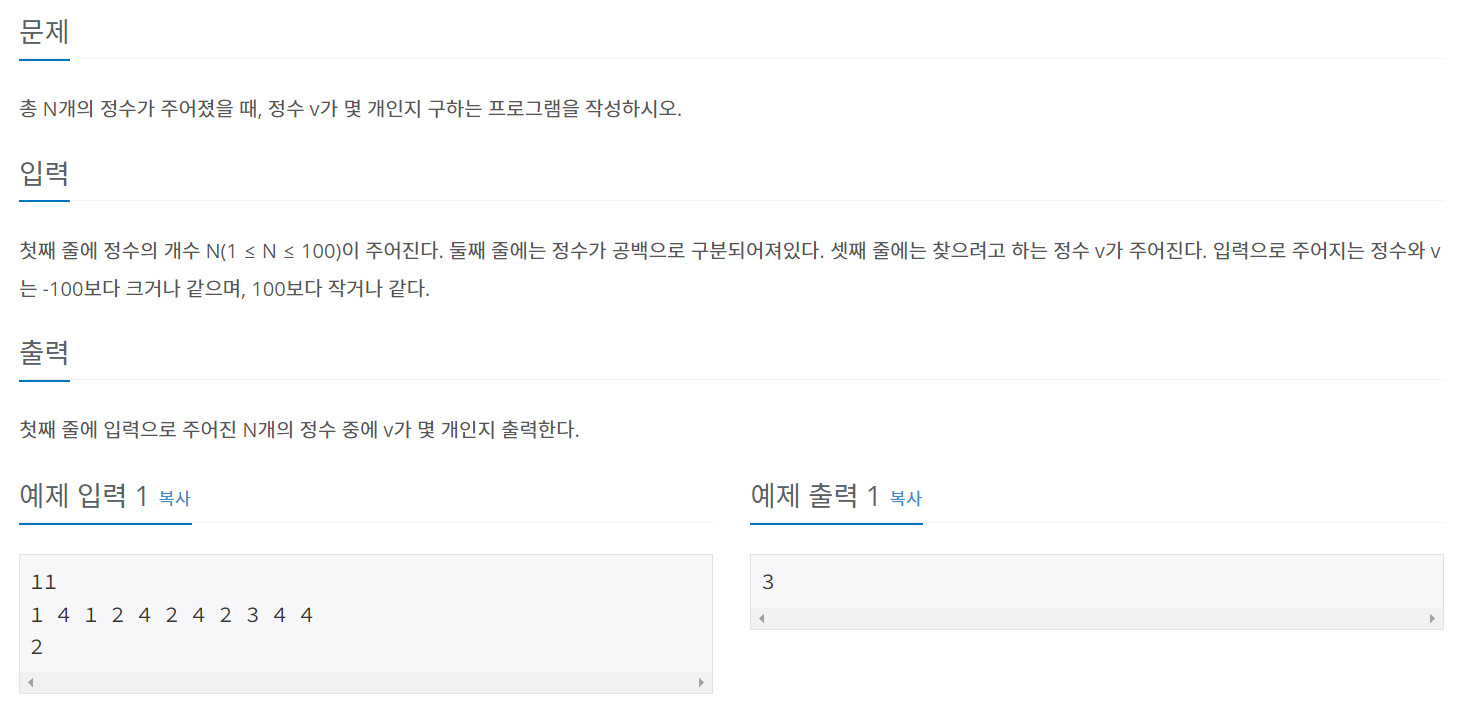

In [4]:
a = int(input())
list_ = list(map(int, input().split()))
b = int(input())
print(list.count(b))

3


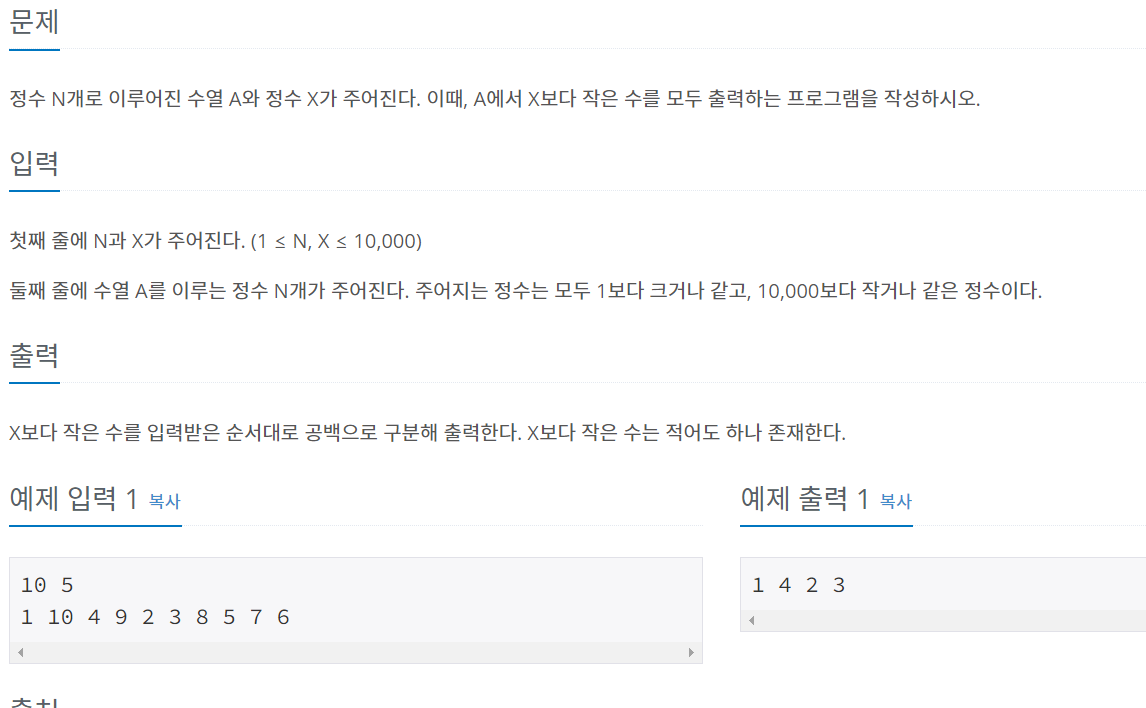

In [7]:
a, b = map(int, input().split())
list = map(int, input().split())
num = []
for i in list:
    if i < b:
        num.append(i)
print(num)

[1, 4, 2, 3]


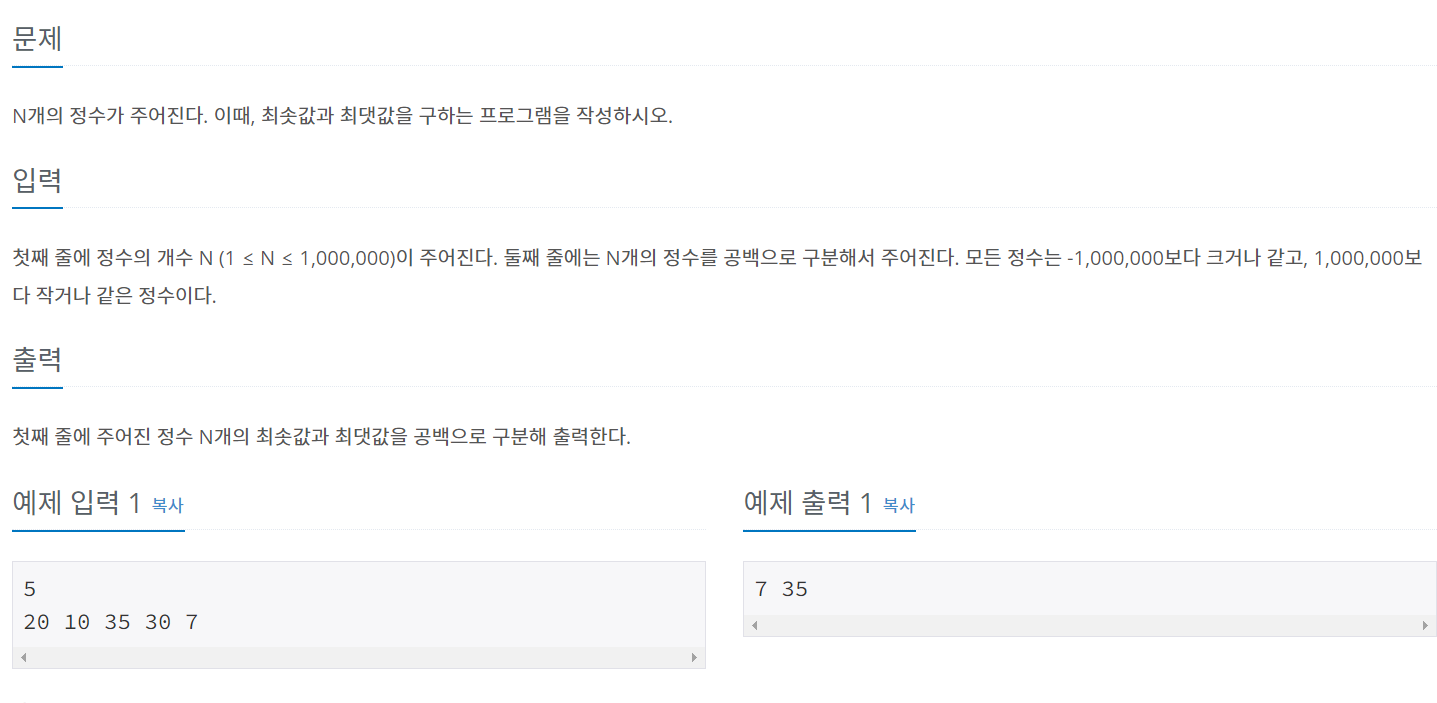

In [1]:
a = int(input())
b = list(map(int, input().split()))

print(min(b), max(b))

10 50


---

In [22]:
#  라이브러리 로드

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, anderson, kstest,jarque_bera, normaltest,anderson_ksamp
from scipy.stats import levene,bartlett
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector

In [6]:
#  정규성 검정하는 함수

def normality_test(df, tool = 'Shapiro'):
    test = {'col' : [], 'p_value' : [], 't_value' : []}
    if tool == 'Shapiro':
       for i in df.columns:
           statistic, p_value = shapiro(df[i].values)
           test["col"].append(i)
           test["p_value"].append(p_value)
           test["t_value"].append(statistic)
           test1 = pd.DataFrame(test)
    
    elif tool == 'ks':
        for i in df.columns:
            statistic, p_value = kstest(df[i].values, 'norm')
            test["col"].append(i)
            test["p_value"].append(p_value)
            test["t_value"].append(statistic)
            test1 = pd.DataFrame(test)
    
    elif tool == 'jarque':
        for i in df.columns:
            statistic, p_value = jarque_bera(df[i].values)
            test["col"].append(i)
            test["p_value"].append(p_value)
            test["t_value"].append(statistic)
            test1 = pd.DataFrame(test)

    elif tool == 'normal':
        for i in df.columns:
            statistic, p_value = normaltest(df[i].values)
            test["col"].append(i)
            test["p_value"].append(p_value)
            test["t_value"].append(statistic)
            test1 = pd.DataFrame(test)
    
    elif tool == 'anderson':
        test = {'col' : [], 'critical_value' : [], 't_value' : []}
        for i in df.columns:
            result = anderson(df[i].values)
            test["col"].append(df.columns)
            test['critical_value'].append(result.critical_values[2])
            test["t_value"].append(result.statistic)
            test1 = pd.DataFrame(test)

    return test1

# 등분산 검정 함수

def homoscedacsticity_test(df, tool):
    test = {'col' : [], 'p_value' : [], 't_value' : []}
    if tool =='levene':
        for i in df.columns:
            t_value, p_value = levene(df[df['point'] ==1][i], df[df['point'] ==0][i])
            test['col'].append(i)
            test['p_value'].append(p_value)
            test['t_value'].append(t_value)
            test1 = pd.DataFrame(test)
    
    elif tool == 'bartlett':
        for i in df.columns:
            t_value, p_value = bartlett(df[df['point'] ==1][i], df[df['point'] ==0][i])
            test['col'].append(i)
            test['p_value'].append(p_value)
            test['t_value'].append(t_value)
            test1 = pd.DataFrame(test)

    return test1

# 더빈왓슨 자기 상관성 검정

def durbin(df):
    dw_statistic = sm.stats.stattools.durbin_watson(df.target)
    if dw_statistic < 2:
        print("양의 자기상관이 있다.",dw_statistic)
    elif dw_statistic > 2:
        print("음의 자기상관이 있다.",dw_statistic)
    else:
        print("자기상관이 없다.",dw_statistic)

---
# LinearRegression

    # statsmodels 패키지를 사용한 선형 회귀분석

    iris = load_iris()

    # 독립 변수와 종속 변수 데이터 준비
    X = iris.data
    y = iris.target

    # OLS 모델 생성
    ols_model = sm.OLS(y, sm.add_constant(X))

    # OLS 모델 피팅 및 결과 요약
    ols_result = ols_model.fit()
    print(ols_result.summary())
---
    sklearn 패키지를 사용한 선형 회귀분석
    # 선형 회귀 모델 초기화
    model = LinearRegression() # 상수항 결합을 자동으로 해주므로 사용자가 직접 add_constant 등의 명령를 써서 상수항 결합을 할 필요는 없다.

    # 모델 피팅
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    # 예측값과 실제값을 빼줘서 잔차 도출
    잔차 = pred - y_test
    잔차.reset_index( drop=True, inplace=True)

    # 절편, 회귀계수 출력
    df_co = pd.DataFrame(data=model.coef_, columns=model.feature_names_in_)
    print("절편:", model.intercept_)
    print(mean_squared_error(y_test,pred))
    df_co

    

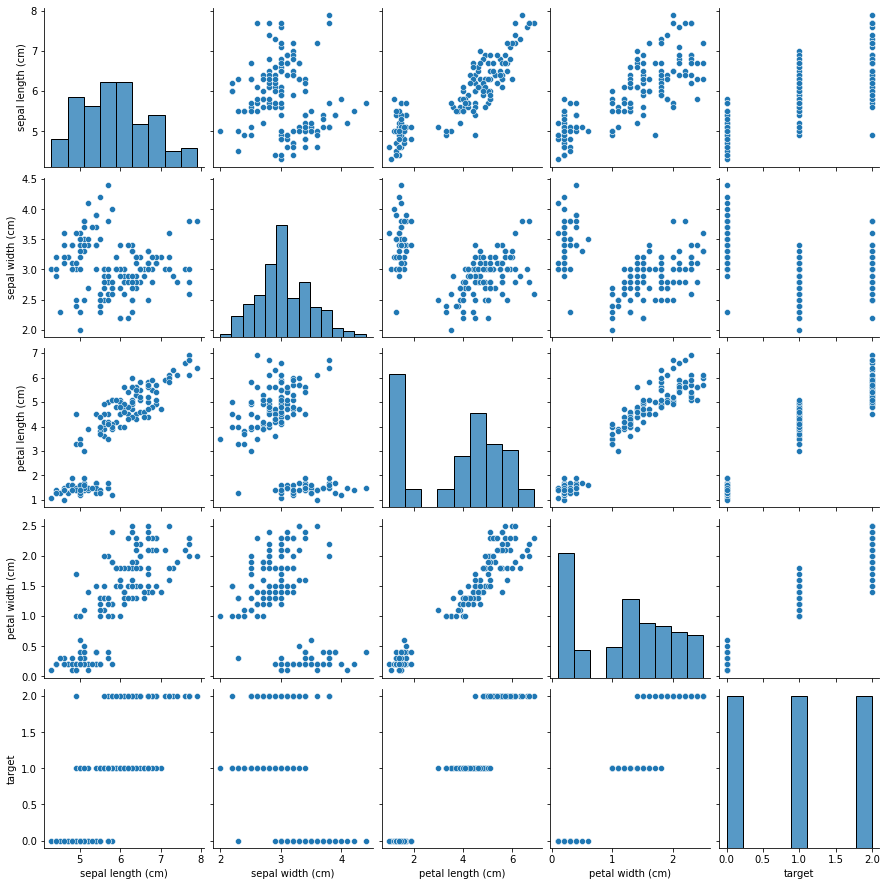

In [8]:
# 산점도 그래프를 이용해서 선형 관계 확인
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["target"])
df_iris = pd.concat([X,y], axis=1)
sns.pairplot(df_iris)

In [9]:
# ols를 이용한 선형 회귀 분석

# statsmodels 패키지를 사용한 선형 회귀분석

iris = load_iris()

# 독립 변수와 종속 변수 데이터 준비
X = iris.data
y = iris.target

# OLS 모델 생성
ols_model = sm.OLS(y, sm.add_constant(X))

# OLS 모델 피팅 및 결과 요약
ols_result = ols_model.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     484.5
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           8.46e-83
Time:                        20:06:21   Log-Likelihood:                 17.437
No. Observations:                 150   AIC:                            -24.87
Df Residuals:                     145   BIC:                            -9.821
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1865      0.205      0.910      0.3

In [15]:
# 다중공선성 확인
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns 

vif

,VIF Factor,features
0,262.969348,sepal length (cm)
1,96.353292,sepal width (cm)
2,172.960962,petal length (cm)
3,55.502060,petal width (cm)


In [2]:
#  변수 선택

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["target"])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  변수 선택 후 결과 저장할 데이터 프레임 생성
df_select = pd.DataFrame()
df_select.index = x_train.columns

# 트레인 테스트 데이터 분리

selector = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=3, direction = "forward" , scoring='r2', cv=5,n_jobs=-1)
selector.fit(x_train, y_train)
df_select["fwd"] = selector.get_support().tolist()

selector = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=3, direction = "backward" , scoring='r2', cv=5,n_jobs=-1)
selector.fit(x_train, y_train)
df_select["bwd"] = selector.get_support().tolist()

df_select

,fwd,bwd
sepal length (cm),True,True
sepal width (cm),False,False
petal length (cm),True,True
petal width (cm),True,True


In [3]:
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

잔차 = pred - y_test
잔차.reset_index(drop = True, inplace = True)

df_co = pd.DataFrame(data = model.coef_, columns = model.feature_names_in_)
print('절편 :', model.intercept_)
print(mean_squared_error(y_test, pred))
df_co

절편 : [0.25252759]
0.03711379440797687


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.116335,-0.059778,0.254914,0.547596


In [4]:
cut_off_point = np.percentile(잔차, 50)
cut_off_point

0.024337223626161752

In [20]:
cut_off_point = np.percentile(잔차["target"], 50)
잔차["point"] = 0
잔차.loc[잔차["target"] > cut_off_point, "point"] = 1

print(normality_test(잔차))
print("-------------------------------------------")
print(homoscedacsticity_test(잔차,tool="bartlett"))

      col       p_value   t_value
0  target  4.652496e-01  0.967183
1   point  2.211095e-07  0.638237
-------------------------------------------
      col  p_value  t_value
0  target      NaN      NaN
1   point      NaN      NaN


In [21]:
durbin(잔차)

양의 자기상관이 있다. 1.711607001051078


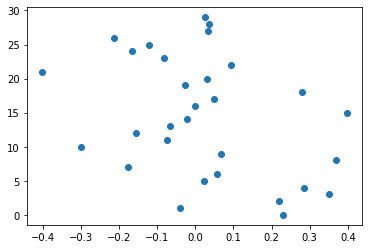

In [23]:
plt.scatter(잔차.target, 잔차.index)

In [24]:
# 잔차 분석(정규성, 등분산성, 독립성)
# 정규성 검정
normality_test(잔차, 'Shapiro')

,col,p_value,t_value
0,target,0.46525,0.967183


In [27]:
잔차['point'] = 0

In [29]:
잔차.loc[잔차['target'] > np.percentile(잔차['target'], 50), 'point'] = 1
# 잔차.loc[잔차['target'] <= np.percentile(잔차['target'], 50), 'point'] = 0
잔차

,target,point
0,0.230717,1
1,-0.040104,0
2,0.219703,1
3,0.349669,1
4,0.284293,1
5,0.022484,0
6,0.057261,1
7,-0.175963,0
8,0.368246,1
9,0.067664,1


In [24]:
homoscedacsticity_test(잔차, 'levene')

,col,p_value,t_value
0,target,NaN,NaN
1,point,NaN,NaN
